In [2]:
import pandas as pd
import numpy as np
import requests as r
import re
import json
import matplotlib.pyplot as plt
import matplotlib as mt
import seaborn as sns
import datetime 
import calendar
from pandas import option_context
from matplotlib.patches import PathPatch
%matplotlib inline

# Gathering Data

In [46]:
#supplied file
archive = pd.read_csv("twitter-archive-enhanced.csv")

#programmatically download tsv file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image = pd.read_csv(url, sep = "\t")

#writing Json data line by line into api df
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api = pd.DataFrame(df_list)

# Assessment

## Assissing Archive

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [5]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2184,668988183816871936,NaN,NaN,2015-11-24 03:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Lots of fur on him. Tw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668988183...,7,10,None,None,None,None,None
210,852189679701164033,NaN,NaN,2017-04-12 16:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailor. He has collected the best dirt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852189679...,12,10,Sailor,None,None,None,None
696,786664955043049472,NaN,NaN,2016-10-13 20:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Honestly Kathleen I just want more Ken Bone"" ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786664955...,12,10,None,None,None,None,None
2061,671166507850801152,NaN,NaN,2015-11-30 03:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herm. It's his first day of potty trai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671166507...,10,10,Herm,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# checking retweets
retweets = archive.retweeted_status_id.notnull()
archive[retweets].shape[0]

181

In [9]:
# checking replies
replies = archive.in_reply_to_status_id.notnull()
archive[replies].shape[0]

78

In [10]:
# Checking tweets without images
archive.expanded_urls.isnull().sum()

59

In [11]:
# Checking rating_numerator  
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [81]:
#investigating rating_numerator >=20
df2 = archive_clean[archive_clean['rating_numerator'] >= 20]
df2[['tweet_id','tweet_context','rating_numerator','rating_denominator']]

,tweet_id,tweet_context,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [62]:
# Checking rating_denominator  
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [80]:
#investigating rating_dominator !=10
df = archive_clean[archive_clean['rating_denominator'] != 10]
pd.set_option("display.max_colwidth", -1)
df[['tweet_id','tweet_context','rating_numerator','rating_denominator']]


<ipython-input-80-af1b2bcbeec9>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,tweet_id,tweet_context,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [87]:
#investigating zero rating
archive_clean[archive_clean.rating_numerator == 0]

,tweet_id,timestamp,source,tweet_context,expanded_urls,rating_numerator,rating_denominator,dog_name,year,quarter,month,day,dog_class
315,835152434251116546,2017-02-24 15:40:31+00:00,Twitter for iphone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,NaN,2017,2017Q4,Feb,Fri,NaN


In [63]:
#Checking dog names
archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Buckley      1
Skittle      1
Stella       1
Pilot        1
Monster      1
Name: name, Length: 957, dtype: int64

## Assessing Image_prediction

In [89]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [90]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [91]:
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
276,670840546554966016,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1,Shih-Tzu,0.963622,True,Lhasa,0.016017,True,guinea_pig,0.007932,False
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
1631,805520635690676224,https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg,1,malinois,0.643147,True,German_shepherd,0.186642,True,Border_terrier,0.109345,True
777,689835978131935233,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,1,collie,0.600186,True,Shetland_sheepdog,0.298939,True,borzoi,0.022616,True
1707,817777686764523521,https://pbs.twimg.com/ext_tw_video_thumb/817777588030476288/pu/img/KbuLpE4krHF4VdPf.jpg,1,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True


In [92]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [93]:
#Checking for replies and retweets
np.logical_not(image.tweet_id.isin(list(archive_clean.tweet_id))).value_counts()

False    1970
True     105 
Name: tweet_id, dtype: int64

In [94]:
#checking for images have all 3 predictions false 
image.query('p1_dog==False and p2_dog==False and p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [114]:
#checking for nan values in jpg_url "no image"
master_data[master_data.jpg_url.isnull()]

,tweet_id,timestamp,source,tweet_context,expanded_urls,rating_numerator,rating_denominator,dog_name,year,quarter,month,day,dog_class,jpg_url,img_num,breed,breed_prediction_level,prediction_confidence_ratio,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,2017,2017Q2,Aug,Tue,NaN,NaN,NaN,NaN,NaN,NaN,8853,39467
21,887517139158093824,2017-07-19 03:39:09+00:00,Twitter for iphone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10.0,Such,2017,2017Q2,Jul,Wed,NaN,NaN,NaN,NaN,NaN,NaN,12082,46959
27,886680336477933568,2017-07-16 20:14:00+00:00,Twitter for iphone,This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,https://twitter.com/dog_rates/status/886680336477933568/photo/1,13.0,10.0,Derek,2017,2017Q2,Jul,Sun,NaN,NaN,NaN,NaN,NaN,NaN,4610,22798
32,885518971528720385,2017-07-13 15:19:09+00:00,Twitter for iphone,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,https://twitter.com/4bonds2carbon/status/885517367337512960,14.0,10.0,NaN,2017,2017Q2,Jul,Thu,NaN,NaN,NaN,NaN,NaN,NaN,3899,20788
38,884247878851493888,2017-07-10 03:08:17+00:00,Twitter for iphone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,https://twitter.com/kaijohnson_19/status/883965650754039809,13.0,10.0,NaN,2017,2017Q2,Jul,Mon,NaN,NaN,NaN,NaN,NaN,NaN,21298,74423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,666362758909284353,2015-11-16 21:10:36+00:00,Twitter for iphone,Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM,https://twitter.com/dog_rates/status/666362758909284353/photo/1,6.0,10.0,NaN,2015,2015Q3,Nov,Mon,NaN,NaN,NaN,NaN,NaN,NaN,595,804
2071,666293911632134144,2015-11-16 16:37:02+00:00,Twitter for iphone,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3.0,10.0,NaN,2015,2015Q3,Nov,Mon,NaN,NaN,NaN,NaN,NaN,NaN,368,522
2074,666268910803644416,2015-11-16 14:57:41+00:00,Twitter for iphone,Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,https://twitter.com/dog_rates/status/666268910803644416/photo/1,10.0,10.0,NaN,2015,2015Q3,Nov,Mon,NaN,NaN,NaN,NaN,NaN,NaN,37,108
2075,666104133288665088,2015-11-16 04:02:55+00:00,Twitter for iphone,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1.0,10.0,NaN,2015,2015Q3,Nov,Mon,NaN,NaN,NaN,NaN,NaN,NaN,6871,14765


## Assessing API Additional data

In [104]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [105]:
api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [106]:
api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# Assessment Observations

## Archive dataframe

### Quality issues  
1- Data type for "tweet_id" is (int) while it should be (string).  
2- There are 181 retweet and 78 reply should be dropped.    
3- "timestamp" column is (object ) while it should be (datetime64)    
4- "text" column should be more descriptive.      
5- There are 59 tweets with no image. Should be dropped.    
6- Some columns include “None” instead of NaN.  Replace them with nan using “np.nan”  
7- "rating_numerator" column has outliers. Some was wrongly extracted, others were combined rating for pack of dogs in one image and the rest were a symbolic rating (ex. rating 1776 is referring to United States Declaration of Independence as the dog in image is wrapping an American flag across it’s neck)  
8- "rating_denominator" has outliers. Similar reasons to “rating_numerator” outliers.  
11- "name" column should be more descriptive.    
12- "source" column not human readable and needs to be converted to "category".    
13- "name" column has missing values and inaccurate names. Correct it.    

### Tidiness Issues  
1- Extracting year, quarter, month and day from timestamp to separate columns for better, concise and meaningful analysis.    
2- Dogs stage classification columns need to be grouped in one column and dropped afterwards.  
3- Retweets and replies related columns should be dropped.

## Image_prediction dataframe

### Quality Issues  
1- tweet_id is "int" while it should be "str".  
2- There are 105 entries of retweets and replies. Will be dropped.  
3- There are 324 entries of False prediction across all levels (checked most of them, they aren't even dogs!). Will be dropped for more accurate analysis.  
4- Some undescriptive columns. Rename them.  
5- Inconsistent capitalization in breed prediction (P1, p2 & p3).    
6- Boolean values of (p1_dog, p2_dog, p3_dog) will be represented in one column “breed_prediction_level”  and it’s values will be converted to “str” values of (L1, L2, L3) based on first True prediction.  
7- Values of (p1_conf, P2_conf, P3_conf) will be represented in one column “confidence_ratio” and it's values will based on breed_prediction_level.  
8- (p1,p2,p3) will be represented in one column to declares dogs' predicted breed based on prediction level.

## API dataframe

### Quality Issues  
1- tweet_id is (int) should be (str).  

### Tidiness Issues  
1- merge api_df with archive_df.  
2- merge all 3 datasets in one master sheet.

# Cleaning Data

## Archive dataframe

In [47]:
#creating a copy 
archive_clean = archive.copy()

### define: Convert timestamp from "object" to "datetime64"

<b>Code</b>

In [48]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

datetime64[ns, UTC]

<b>Test</b>

In [ ]:
archive_clean.timestamp.dtypes

### define: extract year,quarter, month and day from timestamp in new columns (not real issue but i prefer to have them in seperate cols)

<b>code</b>

In [49]:
archive_clean['year']= pd.DatetimeIndex(archive_clean.timestamp).year
archive_clean['quarter'] = pd.PeriodIndex(archive_clean['timestamp'], freq='Q-MAR').strftime('Q%q')
archive_clean['quarter'] = archive_clean.year.astype('str') + archive_clean.quarter
archive_clean['month']= archive_clean.timestamp.dt.strftime('%b')
archive_clean['day']= archive_clean.timestamp.dt.strftime('%a')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,quarter,month,day
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,2017,2017Q2,Aug,Tue
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,2017,2017Q2,Aug,Tue
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,None,None,None,None,2017,2017Q2,Jul,Mon
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,None,None,None,None,2017,2017Q2,Jul,Sun
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,None,None,None,None,2017,2017Q2,Jul,Sat


<b>test</b>

In [ ]:
archive_clean.head(1)

### define: delete retweets and replies rows

<b>code</b>

In [50]:
# deleting retweets 
retweets = archive_clean.retweeted_status_id.notnull()
archive_clean = archive_clean[~retweets]

In [51]:
# deleting replies
replies = archive_clean.in_reply_to_status_id.notnull()
archive_clean = archive_clean[~replies]

<b>test</b>

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### define: drop retweets and replies related cols

<b>code</b>

In [52]:
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
              'retweeted_status_timestamp'], axis=1, inplace=True)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'year',
 'quarter',
 'month',
 'day']

<b>test</b>

In [ ]:
list(archive_clean)

### define: delete tweets have no image (expanded_urls is null)

<b>code</b>

In [53]:
archive_clean = archive_clean.dropna(subset = ['expanded_urls'])

0

<b>test</b>

In [ ]:
archive_clean.expanded_urls.isnull().sum()

### define: source entries aren't human readable. Simplify it and convert it to "category"

<b>code</b>

In [54]:
archive_clean.source =archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
archive_clean.source =archive_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
archive_clean.source =archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
archive_clean.source =archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')
archive_clean.astype({'source':'category'})

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
year                                int64
quarter                            object
month                              object
day                                object
dtype: object

<b>test</b>

In [ ]:
archive_clean.head()

In [ ]:
archive_clean.info()

### define: Dogs stage cols need to be grouped in on col  
1- replace None to empty str ""  
2- group dogs stage cols in one col  
3- some tweets have two dogs in one image making their stages more clear by adding "-" in betwwen  
4- replace empty str "" with np.nan  
5- drop the dogs stage 4 cols

<b>code</b>

In [56]:
# replacing None strings with empty string ""
archive_clean = archive_clean.replace("None", "")

In [57]:
# grouping dog stage classification in one col
archive_clean['dog_class'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper+ archive_clean.puppo 

                1759
pupper           220
doggo             72
puppo             23
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_class, dtype: int64

In [58]:
# some tweets have two dogs in one image making their stages more clear by adding "-" in betwwen 
archive_clean = archive_clean.replace({'dog_class' : { 'doggopupper' : 'doggo-pupper', 'doggopuppo' : 'doggo-puppo',
                                                      'doggofloofer' : 'doggo-floofer' }})

                 1759
pupper            220
doggo              72
puppo              23
doggo-pupper        9
floofer             9
doggo-puppo         1
doggo-floofer       1
Name: dog_class, dtype: int64

In [59]:
# replacing empty strings with "NaN"
archive_clean = archive_clean.replace("", np.nan)

<b>test</b>

In [ ]:
archive_clean.dog_class.value_counts()

In [60]:
# dropping 4  dog stage classifications cols
archive_clean.drop(columns=['doggo','floofer', 'pupper', 'puppo'], inplace=True)

<b>test</b>

In [ ]:
list(archive_clean)

### define: rename "name" and "text" cols to be more descriptive

<b>code</b>

In [61]:
archive_clean.rename(columns={'name': 'dog_name', 'text': 'tweet_context'}, inplace=True)

<b>test</b>

In [ ]:
list(archive_clean)

### define: dog_name col has incorrect dog name. Creat pattern with regex to correct them

<b>code</b>

In [64]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():  
    try:
        if row['dog_name'] == "a":
            c_name = re.findall(pattern, row['tweet_context'])[0]
            archive_clean.loc[index,'dog_name'] = archive_clean.loc[index,'dog_name'].replace('a', c_name)
        elif row['dog_name'] == 'an':
            c_name = re.findall(pattern, row['tweet_context'])[0]
            archive_clean.loc[index,'dog_name'] = archive_clean.loc[index,'dog_name'].replace('an', c_name)
        elif row['dog_name'] == 'the':
            c_name = re.findall(pattern, row['tweet_context'])[0]
            archive_clean.loc[index,'dog_name'] = archive_clean.loc[index,'dog_name'].replace('the', c_name)
    except IndexError:
        archive_clean.loc[index,'dog_name'] = np.nan

NaN             648
Charlie          11
Lucy             11
Oliver           10
Cooper           10
               ... 
Biden             1
Tino              1
unacceptable      1
Meyer             1
Monster           1
Name: dog_name, Length: 970, dtype: int64

<b>test<b/>

In [ ]:
archive_clean.dog_name.value_counts(dropna = False)

### define: Capitalize dog names for consistency

<b>code</b>

In [65]:
archive_clean.dog_name = archive_clean.dog_name.str.capitalize() 

### define: fix wrong extracted rating numeraitor/denominator

<b>code</b>

In [82]:
# fixing wrong extracted denominator
archive_clean.loc[archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 775096608509886464, ['rating_denominator']] = 10

In [83]:
# fixing wrong extracted numerator
archive_clean.loc[archive_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
archive_clean.loc[archive_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
archive_clean.loc[archive_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
archive_clean.loc[archive_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
archive_clean.loc[archive_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9
archive_clean.loc[archive_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
archive_clean.loc[archive_clean.tweet_id == 775096608509886464, ['rating_numerator']] = 14
archive_clean.loc[archive_clean.tweet_id == 832215909146226688, ['rating_numerator']] = 9.75
archive_clean.loc[archive_clean.tweet_id == 786709082849828864, ['rating_numerator']] = 9.75
archive_clean.loc[archive_clean.tweet_id == 778027034220126208, ['rating_numerator']] = 11.27
archive_clean.loc[archive_clean.tweet_id == 680494726643068929, ['rating_numerator']] = 11.26

#in this tweet 1776 not a rating it refers to The Declaration of Independence for USA as the dog wrapping US flag
archive_clean.loc[archive_clean.tweet_id == 749981277374128128, ['rating_numerator']] = np.nan
archive_clean.loc[archive_clean.tweet_id == 749981277374128128, ['rating_denominator']] = np.nan

# this tweet doesn't have a real dog image it's an image of "snoop dogg" -American rapper - and 420 isn't rating it refers to stoners comnunity
archive_clean.loc[archive_clean.tweet_id == 670842764863651840, ['rating_numerator']] = np.nan
archive_clean.loc[archive_clean.tweet_id == 670842764863651840, ['rating_denominator']] = np.nan

### define: fix ratings for multiple dogs in one image. Dividing numerators and denominator by number of dogs per image

<b>code</b>

In [84]:
#fixing below ratings as it was rating for multiple dogs in one image
archive_clean.loc[archive_clean.tweet_id == 675853064436391936, ['rating_numerator']] = 88/8
archive_clean.loc[archive_clean.tweet_id == 675853064436391936, ['rating_denominator']] = 80/8
archive_clean.loc[archive_clean.tweet_id == 677716515794329600, ['rating_numerator']] = 144/12
archive_clean.loc[archive_clean.tweet_id == 677716515794329600, ['rating_denominator']] = 120/12
archive_clean.loc[archive_clean.tweet_id == 684222868335505415, ['rating_numerator']] = 121/11
archive_clean.loc[archive_clean.tweet_id == 684222868335505415, ['rating_denominator']] = 110/11
archive_clean.loc[archive_clean.tweet_id == 684225744407494656, ['rating_numerator']] = 143/13
archive_clean.loc[archive_clean.tweet_id == 684225744407494656, ['rating_denominator']] = 130/13
archive_clean.loc[archive_clean.tweet_id == 697463031882764288, ['rating_numerator']] = 44/4
archive_clean.loc[archive_clean.tweet_id == 697463031882764288, ['rating_denominator']] = 40/4
archive_clean.loc[archive_clean.tweet_id == 704054845121142784, ['rating_numerator']] = 60/5
archive_clean.loc[archive_clean.tweet_id == 704054845121142784, ['rating_denominator']] = 50/5
archive_clean.loc[archive_clean.tweet_id == 709198395643068416, ['rating_numerator']] = 45/5
archive_clean.loc[archive_clean.tweet_id == 709198395643068416, ['rating_denominator']] = 50/5
archive_clean.loc[archive_clean.tweet_id == 710658690886586372, ['rating_numerator']] = 80/8
archive_clean.loc[archive_clean.tweet_id == 710658690886586372, ['rating_denominator']] = 80/8
archive_clean.loc[archive_clean.tweet_id == 713900603437621249, ['rating_numerator']] = 99/9
archive_clean.loc[archive_clean.tweet_id == 713900603437621249, ['rating_denominator']] = 90/9
archive_clean.loc[archive_clean.tweet_id == 731156023742988288, ['rating_numerator']] = 204/17
archive_clean.loc[archive_clean.tweet_id == 731156023742988288, ['rating_denominator']] = 170/17
archive_clean.loc[archive_clean.tweet_id == 758467244762497024, ['rating_numerator']] = 165/15
archive_clean.loc[archive_clean.tweet_id == 758467244762497024, ['rating_denominator']] = 150/15
archive_clean.loc[archive_clean.tweet_id == 820690176645140481, ['rating_numerator']] = 84/7
archive_clean.loc[archive_clean.tweet_id == 820690176645140481, ['rating_denominator']] = 70/7
archive_clean.loc[archive_clean.tweet_id == 810984652412424192, ['rating_numerator']] = np.nan
archive_clean.loc[archive_clean.tweet_id == 810984652412424192, ['rating_denominator']] = np.nan


<b>test</b>

In [85]:
#checking rating_denominator
archive_clean.rating_denominator.value_counts()

10.0    2091
Name: rating_denominator, dtype: int64

In [86]:
#checking rating_numerator
archive_clean.rating_numerator.value_counts()

12.00    489
10.00    436
11.00    419
13.00    288
9.00     154
8.00     98 
7.00     51 
14.00    39 
5.00     34 
6.00     32 
3.00     19 
4.00     15 
2.00     9  
1.00     4  
11.27    1  
11.26    1  
9.75     1  
0.00     1  
Name: rating_numerator, dtype: int64

### Define drop zero rating row as it has two images of the same dog with different ratings 

<b>code</b>

In [88]:
archive_clean.drop([archive_clean.index[315]],inplace=True)

## Image Dataframe

In [95]:
#creating copy of the original dataset
image_clean = image.copy()

### define: drop retweets and replies entries

<b>code</b>

In [96]:
image_clean = image_clean[~np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id)))]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1970 non-null   int64  
 1   jpg_url   1970 non-null   object 
 2   img_num   1970 non-null   int64  
 3   p1        1970 non-null   object 
 4   p1_conf   1970 non-null   float64
 5   p1_dog    1970 non-null   bool   
 6   p2        1970 non-null   object 
 7   p2_conf   1970 non-null   float64
 8   p2_dog    1970 non-null   bool   
 9   p3        1970 non-null   object 
 10  p3_conf   1970 non-null   float64
 11  p3_dog    1970 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.7+ KB


<b>test</b>

In [ ]:
image_clean.info()

### define: drop rows include 3 flase breed predictions as they aren't dogs

<b>code</b>

In [97]:
image_clean= image_clean.drop(image_clean.loc[((image_clean.p1_dog==False) & (image_clean.p2_dog==False) & (image_clean.p3_dog==False))].index)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1665 non-null   int64  
 1   jpg_url   1665 non-null   object 
 2   img_num   1665 non-null   int64  
 3   p1        1665 non-null   object 
 4   p1_conf   1665 non-null   float64
 5   p1_dog    1665 non-null   bool   
 6   p2        1665 non-null   object 
 7   p2_conf   1665 non-null   float64
 8   p2_dog    1665 non-null   bool   
 9   p3        1665 non-null   object 
 10  p3_conf   1665 non-null   float64
 11  p3_dog    1665 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 135.0+ KB


<b>test</b>

In [ ]:
image.query('p1_dog==False and p2_dog==False and p3_dog==False')

### define:  combine breed predictions (p1,p2,p3) in one col based on first true prediction as p1_dog alwasy has higher confidence ratio

<b>code</b>

In [98]:
conditions = [
    (image_clean['p1_dog'] == True), (image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == True),
    (image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == False) & (image_clean['p3_dog'] == True)
]
values = [image_clean.p1,image_clean.p2,image_clean.p3]
image_clean['breed'] = np.select(conditions, values)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


<b>test</b>

In [ ]:
image_clean.head()

### define: combine prediction levels in one col based on first true prediction as p1_dog alwasy has higher confidence ratio

<b>code</b>

In [99]:
conditions = [
    (image_clean['p1_dog'] == True), (image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == True),
    (image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == False) & (image_clean['p3_dog'] == True)
]
values = ['L1','L2','L3']
image_clean['breed_prediction_level'] = np.select(conditions, values)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,breed_prediction_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,L1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,L1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,L1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,L1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,L1


<b>test</b>

In [ ]:
image_clean.head()

### define: combine confidence levels in one col based on first true prediction as p1_dog always has higher confidence ratio

<b>code</b>

In [100]:
conditions = [
    (image_clean['p1_dog'] == True), (image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == True),
    (image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == False) & (image_clean['p3_dog'] == True)
]
values = [image_clean.p1_conf,image_clean.p2_conf,image_clean.p3_conf]
image_clean['prediction_confidence_ratio'] = np.select(conditions, values)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,breed_prediction_level,prediction_confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,L1,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,L1,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,L1,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,L1,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,L1,0.560311


<b>test</b>

In [ ]:
image_clean.head()

### define: drop unneeded cols (p1,p2,p3) (p1_conf,p2_conf,p3_conf) (p1_dog,p2_dog,p3_dog)

In [101]:
image_clean.drop(['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'],axis=1,inplace=True)

,tweet_id,jpg_url,img_num,breed,breed_prediction_level,prediction_confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,L1,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,L1,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,L1,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,L1,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,L1,0.560311


<b>test</b>

In [ ]:
image_clean.head()

### define: capitalize breed col for consistency

<b>code</b>

In [103]:
image_clean.breed = image_clean.breed.str.capitalize()

<b>test</b>

In [ ]:
image_clean.breed.value_counts()

## API Dataframe

In [108]:
# creating copy of the original dataset
api_clean = api.copy()

### define: convert tweet_id in all datasets to from "int" to "str"

<b>code</b>

In [109]:
api_clean.tweet_id = api_clean.tweet_id.astype('str')
archive_clean.tweet_id = archive_clean.tweet_id.astype('str')
image_clean.tweet_id = image_clean.tweet_id.astype('str')

### define: store the 3 cleaned datasets to seperate csv files 

<b>code</b>

In [110]:
archive_clean.to_csv('cleaned_archive.csv')
image_clean.to_csv('cleaned_image.csv')
api_clean.to_csv('cleaned_api.csv')

### define: merge all dataframes in master dataframe

<b>code</b>

In [111]:
master_data = pd.merge(archive_clean, image_clean, how='left', on=['tweet_id'])
master_data = pd.merge(master_data, api_clean, how="left", on=['tweet_id'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   tweet_id                     2093 non-null   object             
 1   timestamp                    2093 non-null   datetime64[ns, UTC]
 2   source                       2093 non-null   object             
 3   tweet_context                2093 non-null   object             
 4   expanded_urls                2093 non-null   object             
 5   rating_numerator             2090 non-null   float64            
 6   rating_denominator           2090 non-null   float64            
 7   dog_name                     1445 non-null   object             
 8   year                         2093 non-null   int64              
 9   quarter                      2093 non-null   object             
 10  month                        2093 non-null   obj

<b>test</b>

In [ ]:
master_data.info()

In [113]:
# checking for duplicated tweet_ids 
master_data[master_data.tweet_id.duplicated()]

,tweet_id,timestamp,source,tweet_context,expanded_urls,rating_numerator,rating_denominator,dog_name,year,quarter,month,day,dog_class,jpg_url,img_num,breed,breed_prediction_level,prediction_confidence_ratio,retweet_count,favorite_count


### define: checked large randome samples of  nan jpg; most of them not dogs (chickens, koala,...etc) and some links not found. drop them for more accurate insights and viz

<b>code</b>

In [115]:
no_image = master_data.jpg_url.isnull()
master_data = master_data[~no_image]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 1 to 2092
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   tweet_id                     1665 non-null   object             
 1   timestamp                    1665 non-null   datetime64[ns, UTC]
 2   source                       1665 non-null   object             
 3   tweet_context                1665 non-null   object             
 4   expanded_urls                1665 non-null   object             
 5   rating_numerator             1664 non-null   float64            
 6   rating_denominator           1664 non-null   float64            
 7   dog_name                     1226 non-null   object             
 8   year                         1665 non-null   int64              
 9   quarter                      1665 non-null   object             
 10  month                        1665 non-null   obj

<b>test</b>

In [ ]:
#check rows number after dropping jpg = NaN 
master_data.info()

In [116]:
#store master data to csv
master_data.to_csv('master_data.csv',index=False)

In [3]:
master_data= pd.read_csv('master_data.csv')

# Insights and Visualizations

Kindly note that i didn't write down my conclusion here - just notes - please refer to act_report for full insights and conclusions.

##### Average Favorites and Retweers over time

         favorite_count  retweet_count
quarter                               
2015Q3   2604            1108         
2016Q1   7288            2908         
2016Q2   8904            2962         
2016Q3   14558           4743         
2016Q4   4046            1449         
2017Q1   27481           6687         
2017Q2   31890           6830         
2017Q4   19782           5332         


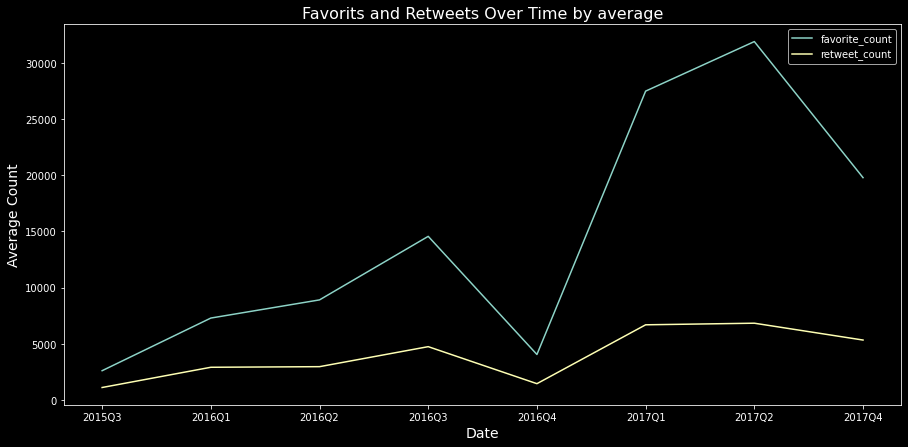

In [117]:
plt.style.use('dark_background')
print(master_data.groupby('quarter')[['favorite_count', 'retweet_count']].mean().round().astype('int64'))
fig, ax = plt.subplots(figsize=(15,7))
master_data.groupby('quarter')[['favorite_count', 'retweet_count']].mean().sort_values(by='quarter').plot(ax=ax)
plt.xlabel('Date', size=14)
plt.ylabel('Average Count', size =14)
plt.title('Favorits and Retweets Over Time by average', size=16);

##### Tweets per month

       tweet_id
month          
Dec         335
Nov         269
Jan         196
Feb         153
Mar         148
Jul         124
Jun         109
Apr          83
May          83
Oct          60
Sep          57
Aug          48


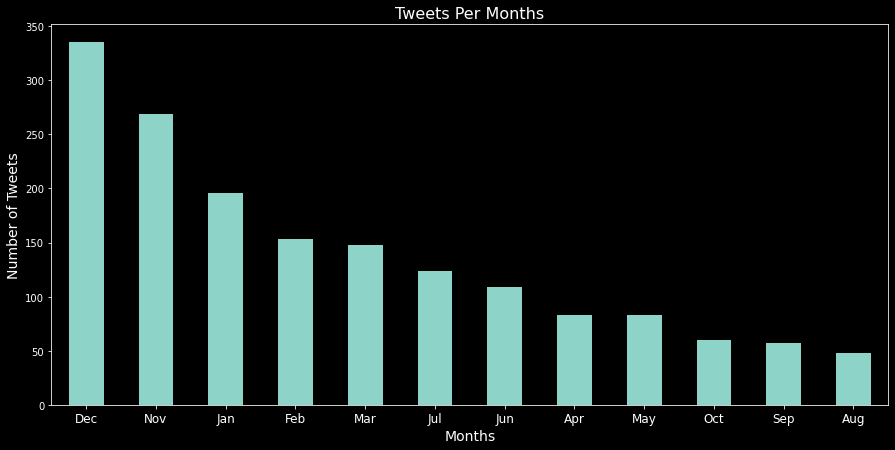

In [14]:
plt.style.use('dark_background')
print(master_data.groupby('month')[['tweet_id']].count().astype('int64').sort_values(by='tweet_id',ascending=False))
fig, ax = plt.subplots(figsize=(15,7))
master_data.groupby('month')[['tweet_id']].count().sort_values(by='tweet_id',ascending=False).plot(ax=ax,legend=False, kind='bar')
plt.xlabel('Months', size=14)
plt.ylabel('Number of Tweets', size =14)
plt.title('Tweets Per Month', size=16)
plt.xticks(size=12, rotation=0);

##### Interactions per months

       favorite_count  retweet_count
month                               
Jul           2009135         507895
Dec           1915572         742000
Jun           1887348         575047
Jan           1656706         563467
Feb           1506329         401462
Mar           1381459         380351
May           1325508         367040
Apr            992397         269643
Nov            886759         307481
Oct            791553         253481
Sep            631179         201233
Aug            479057         151067


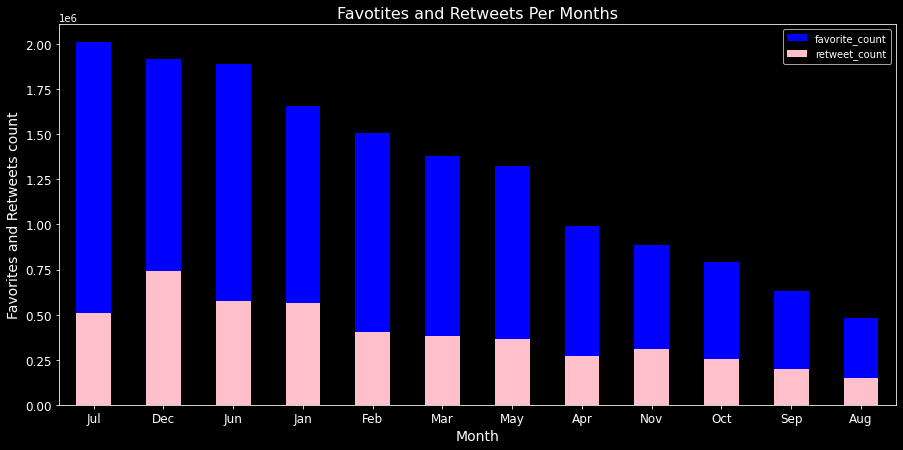

In [18]:
print(master_data.groupby('month')[['favorite_count','retweet_count']].sum().astype('int64').sort_values(by='favorite_count',ascending=False))
fig, ax = plt.subplots(figsize=(15,7))
master_data.groupby('month')[['favorite_count']].sum().sort_values(by='favorite_count',ascending=False).plot(ax=ax,
    kind='bar',color='blue')
master_data.groupby('month')[['retweet_count']].sum().sort_values(by='retweet_count',ascending=False).plot(ax=ax,
    kind='bar',color='pink')
plt.xlabel('Month',size=14)
plt.ylabel('Favorites and Retweets count',size=14)
plt.xticks(size=12, rotation=0)
plt.yticks(size=12)
plt.title('Favotites and Retweets Per Months', size=16);

##### Average Rates per Months

       rating_numerator
month                  
May               11.71
Oct               11.63
Jul               11.50
Aug               11.19
Apr               11.18
Feb               11.14
Jun               11.14
Mar               11.13
Sep               11.13
Jan               10.93
Dec               10.32
Nov                9.87


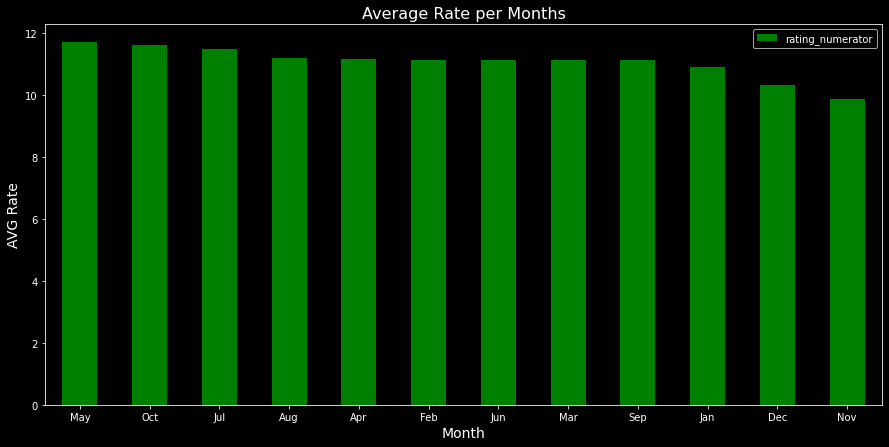

In [31]:
print(master_data.groupby('month')[['rating_numerator']].mean().round(2).sort_values(by='rating_numerator',ascending=False))
fig, ax = plt.subplots(figsize=(15,7))
master_data.groupby('month')[['rating_numerator']].mean().round(2).sort_values(by='rating_numerator',ascending=False).plot(ax=ax,kind='bar', color='green')
plt.xlabel('Month', size=14)
plt.xticks(rotation = 0)
plt.ylabel('AVG Rate', size =14)
plt.title('Average Rate per Months', size=16);

##### Correlation between favorites and retweet 


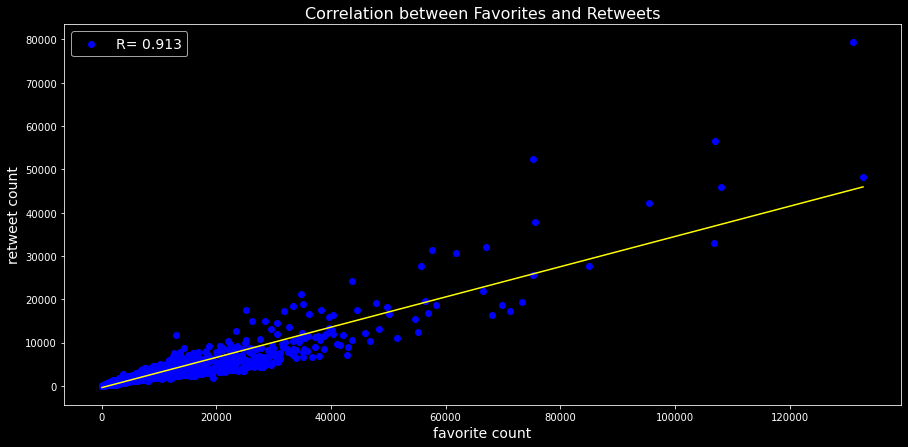

In [32]:
x = master_data.favorite_count
y= master_data.retweet_count
plt.figure(figsize=(15,7))
plt.scatter(x, y, color='blue', label=f'R= {np.round(np.corrcoef(x,y)[0,1], 3)}')
plt.xlabel('favorite count', size =14)
plt.ylabel('retweet count', size =14)
plt.title('Correlation between Favorites and Retweets', size= 16)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.legend(loc='upper left', prop={'size': 14});

##### Interactions per dogs' stage

               favorite_count  retweet_count
dog_class                                   
pupper                1259041         405118
doggo                 1047829         381233
puppo                  450614         133891
doggo-pupper            97024          32617
floofer                 92442          34781
doggo-puppo             47844          19196
doggo-floofer           17169           3433


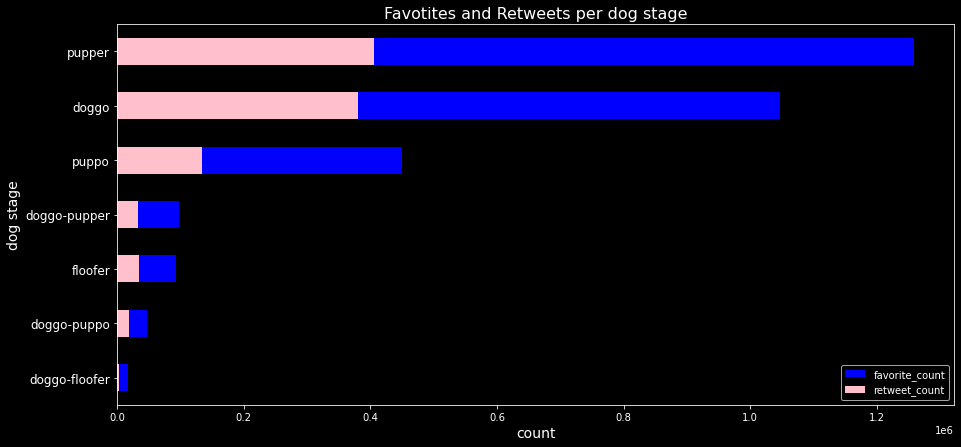

In [33]:
print(master_data.groupby('dog_class')[['favorite_count','retweet_count']].sum().astype('int64').sort_values(by='favorite_count',ascending=False))
fig, ax = plt.subplots(figsize=(15,7))
master_data.groupby('dog_class')[['favorite_count']].sum().sort_values(by='favorite_count',ascending=True).plot(ax=ax,
    kind='barh',color='blue')
master_data.groupby('dog_class')[['retweet_count']].sum().sort_values(by='retweet_count',ascending=True).plot(ax=ax,
    kind='barh',color='pink')
plt.xlabel('count',size=14)
plt.ylabel('dog stage',size=14)
plt.yticks(size=12)
plt.title('Favotites and Retweets per dog stage', size=16);

##### Most favoritaed breeds

breed
Golden_retriever      1943782
Labrador_retriever    1265355
Pembroke              1038797
Chihuahua              743689
Samoyed                583906
Name: favorite_count, dtype: int64


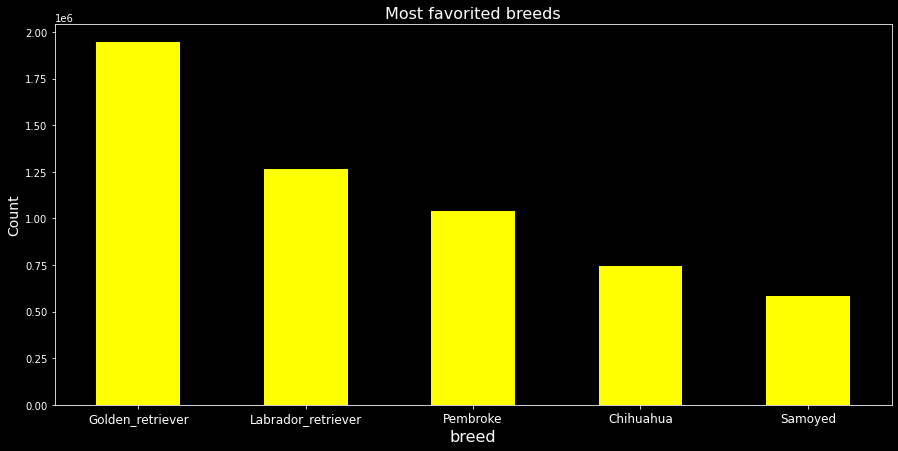

In [35]:
print(master_data.groupby('breed')['favorite_count'].sum().nlargest(5))
plt.figure(figsize=(15,7))
master_data.groupby('breed')['favorite_count'].sum().nlargest(5).plot(kind='bar', color='yellow')
plt.xlabel('breed', size=16)
plt.xticks(rotation = 0, size = 12)
plt.ylabel('Count', size =14)
plt.title('Most favorited breeds', size=16);

##### Most retweeted breeds

breed
Golden_retriever      586657
Labrador_retriever    405404
Pembroke              291771
Chihuahua             250722
Samoyed               203446
Name: retweet_count, dtype: int64


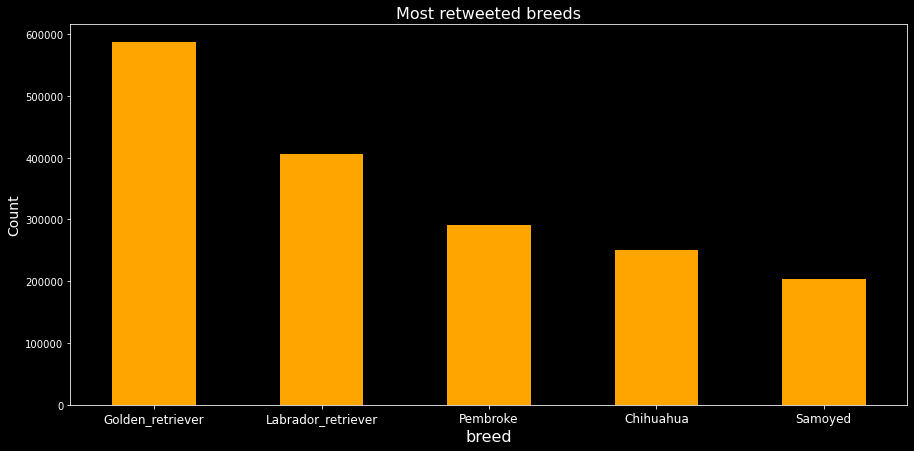

In [37]:
print(master_data.groupby('breed')['retweet_count'].sum().nlargest(5))
plt.figure(figsize=(15,7))
master_data.groupby('breed')['retweet_count'].sum().nlargest(5).plot(kind='bar', color='orange')
plt.xlabel('breed', size=16)
plt.xticks(rotation = 0, size = 12)
plt.ylabel('Count', size =14)
plt.title('Most retweeted breeds', size=16);

##### Top 10 rated breeds

breed
Bouvier_des_flandres    13.00
Saluki                  12.50
Briard                  12.33
Tibetan_mastiff         12.25
Border_terrier          12.14
Silky_terrier           12.00
Standard_schnauzer      12.00
Gordon_setter           11.75
Irish_setter            11.75
Samoyed                 11.69
Name: rating_numerator, dtype: float64


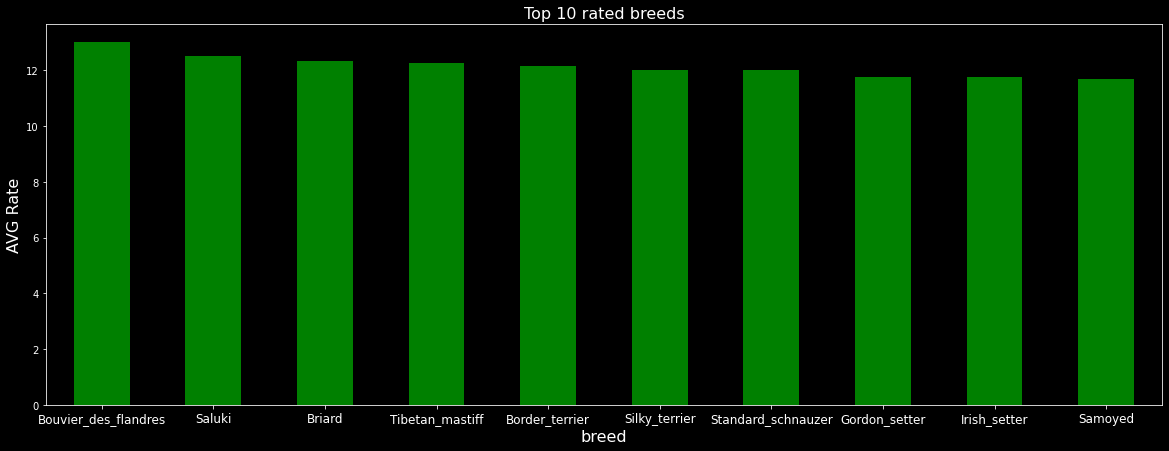

In [40]:
print(master_data.groupby('breed')['rating_numerator'].mean().round(2).nlargest(10))
plt.figure(figsize=(20,7))
master_data.groupby('breed')['rating_numerator'].mean().round(2).nlargest(10).plot(kind='bar', color='green')
plt.xlabel('breed', size=16)
plt.xticks(rotation = 0, size = 12)
plt.ylabel('AVG Rate', size =16)
plt.title('Top 10 rated breeds', size=16);

##### Prediction level proportion

L1    1462
L2    143 
L3    60  
Name: breed_prediction_level, dtype: int64


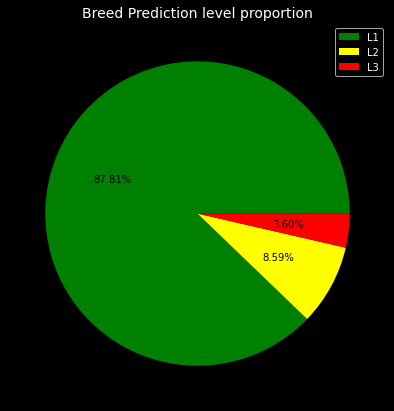

In [177]:
print(master_data.breed_prediction_level.value_counts())
labels = ['L1','L2','L3']
plt.figure(figsize=(7,7))
master_data.breed_prediction_level.value_counts().plot(kind='pie', labels=labels, colors=['green', 'yellow', 'red'],
                                                       autopct='%1.2f%%',textprops={'color':"black"})
plt.ylabel('')
plt.legend()
plt.title('Breed Prediction level proportion', size=14);

##### Confidence ratio across 3 prediction levels

                        prediction_confidence_ratio
breed_prediction_level                             
L1                                             0.62
L2                                             0.11
L3                                             0.05
                        prediction_confidence_ratio
breed_prediction_level                             
L1                                             1.00
L2                                             0.43
L3                                             0.23
                        prediction_confidence_ratio
breed_prediction_level                             
L1                                             0.04
L2                                             0.00
L3                                             0.00


Text(0.5, 1.0, 'Confidence ratio across prediction levels')

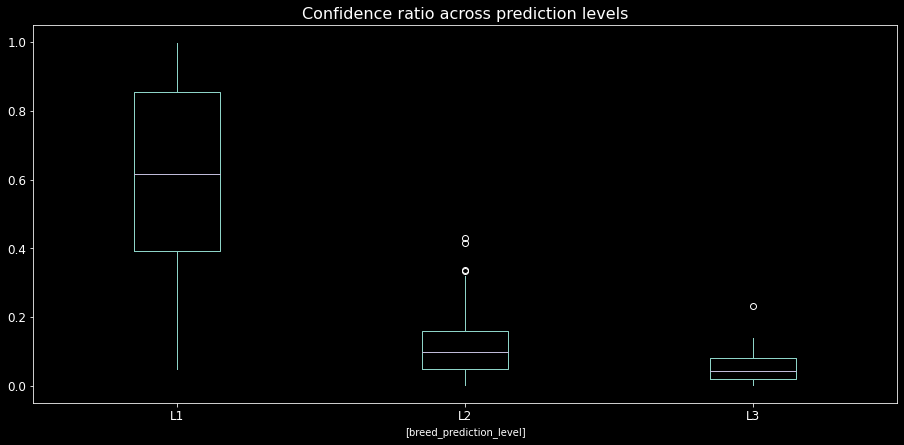

In [46]:
print(master_data.groupby('breed_prediction_level')[['prediction_confidence_ratio']].mean().round(2).sort_values(by='prediction_confidence_ratio',ascending=False))
print(master_data.groupby('breed_prediction_level')[['prediction_confidence_ratio']].max().round(2).sort_values(by='prediction_confidence_ratio',ascending=False))
print(master_data.groupby('breed_prediction_level')[['prediction_confidence_ratio']].min().round(2).sort_values(by='prediction_confidence_ratio',ascending=False))

plt.style.use('dark_background')
master_data.boxplot(by=['breed_prediction_level'],column=['prediction_confidence_ratio'],figsize=(15,7),
                    fontsize='large',grid=False)
plt.suptitle('')
plt.title("Confidence ratio across prediction levels",size=16)